In [ ]:
import datetime
from datetime import date
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import yfinance as yfin
yfin.pdr_override()

# US Treasury Bonds Exploratory Data Analysis

  This report analyzes and explores data as it pertains to securities lending a US Treasury bond. This entails sourcing relevant data and performing exploratory data analysis. In addition to reviewing some of the risks associated with the bond and the security lending market, we will
also explore US Treasury bond yields and trading volumes in the secondary market.

## Part 1 - Risks

The primary set of statistical challenges of bonds are volatility and correlation risk. Bonds carry correlation risk due to the inverse relationship between interest rates and their prices. This can pose concerns for investors as an increase in interest rates over the bond’s holding period can lead to a decline in value. Similarly, bond price fluctuations are primarily driven by changes in interest rates. This makes the volatility of bond prices susceptible to changes in rates offered by the central bank. Although treasury bond prices are considered a less volatile investment, interest rates should be monitored as an indicator of volatility risk.

Bonds also present frictional challenges such as liquidity risk. While some bonds are traded publicly through exchanges, the majority are traded in the secondary Over-The-Counter (OTC) market. Liquidity risk can be a concern with bonds, depending on their maturity and type. This can cause challenges when selling a bond as there is not always instant trading volume in OTC markets.

Furthermore, there are also collateral risks associated with the securities lending of a bond. The primary risk is that the borrower becomes insolvent and cannot return the bond at the end of the agreement. Another risk is that the value of the collateral provided by the borrower can be less than that of the value of the bond at the end of the lending scenario. In both of these
cases the lender would suffer a financial loss.


## Part 2 - US Treasury Bond Yield and Interest Rate Offering

In order to explore the relationship between the historical interest rate offering and various US Treasury Bond yields, we have sourced a dataset from Yahoo Finance for bond yields and Trading Economics for the federal funds rate.

In [ ]:
# Collect Data from Yahoo Finance for US Bond yields

start5 = datetime.date(2020, 1, 1)
end5 = datetime.date(2023, 1, 1) #lets look at 3 years worth of data

FiveYearTreasury_data = web.DataReader(["^FVX"], start5, end5)
TenYearTreasury_data = web.DataReader(["^TNX"], start5, end5)
ThirtyYearTreasury_data = web.DataReader(["^TYX"], start5, end5)

# Create comparison dataframe for yields of 3 different US treasury bonds

TreasuryYieldData = pd.merge(pd.merge(FiveYearTreasury_data['Adj Close'],TenYearTreasury_data['Adj Close'],on='Date'),ThirtyYearTreasury_data['Adj Close'],on='Date')
TreasuryYieldData = TreasuryYieldData.rename(columns={'Adj Close_x': '5 Year Yield', 'Adj Close_y': '10 Year Yield', 'Adj Close': '30 Year Yield'})

# Read data for historical US FEDFUNDS rate

fed_funds_data = pd.read_excel('/content/fed-funds-rate-historical-chart.xlsx', index_col=0)
fed_funds_data = fed_funds_data.rename(columns = {'value':'FEDFUNDS Interest Rate'})
interest_vs_bondyield = pd.merge(TreasuryYieldData,fed_funds_data['FEDFUNDS Interest Rate'],on='Date', how='inner')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<Axes: title={'center': 'Plot of US Interest rates'}, xlabel='Date'>

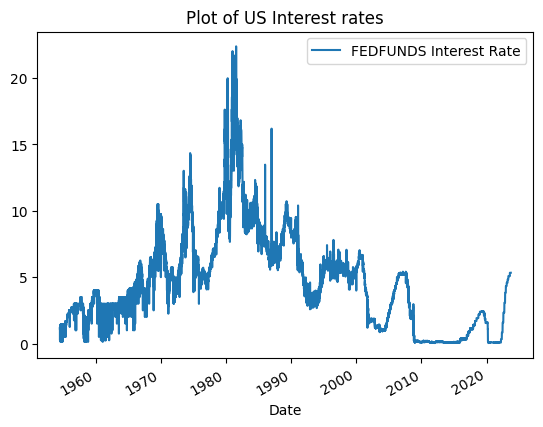

In [ ]:
fed_funds_data.plot(title = 'Plot of US Interest rates')

We begin by plotting the rates against time; the code for all the analysis can be found in the accompanying documents. As depicted in the figure, we observe the interest rate offering from the US treasury dating back to late 1954. The federal funds rate, serving as the central interest rate in the U.S. financial market, plays a pivotal role in determining the yields offered on US Treasury bonds issued at the corresponding time. As a result of this, if interest rates rise after the issuance of a bond at a lower fixed rate, the value of the bond will be diminished as newly issued bonds would reflect this higher yield.

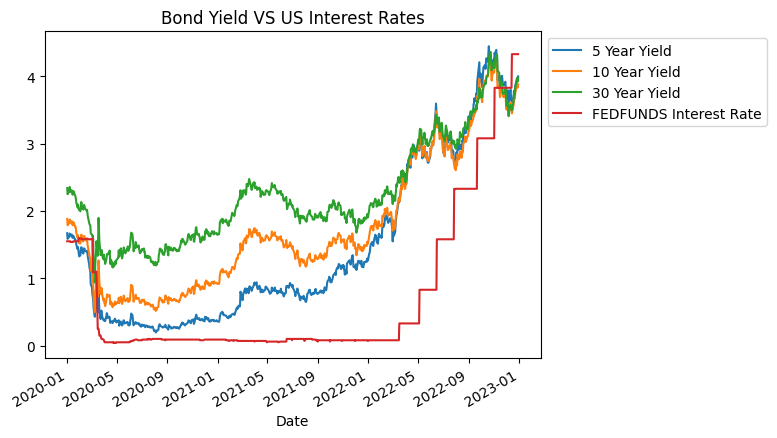

In [ ]:
p0 = interest_vs_bondyield.plot(title = 'Bond Yield VS US Interest Rates')
p0.legend(bbox_to_anchor=(1.0, 1.0))

The plot above shows a comparative view of US treasury bond yields for 5, 10 and 30 year maturities alongside the US interest rate. As expected, this chart shows that the longer the bond's term to maturity is, the higher the yield tends to be. This aligns with the typical expectation that longer term investments yield more than short term securities. Additionally, it is
also evident that the yield offered on these bonds closely follows the US fed funds rate, as we previously discussed.

In [ ]:
interest_vs_bondyield.corr()

,5 Year Yield,10 Year Yield,30 Year Yield,FEDFUNDS Interest Rate
5 Year Yield,1.000000,0.985985,0.956909,0.832108
10 Year Yield,0.985985,1.000000,0.989060,0.809466
30 Year Yield,0.956909,0.989060,1.000000,0.809963
FEDFUNDS Interest Rate,0.832108,0.809466,0.809963,1.000000


A deeper examination of the correlation between these curves further reflects the linked behavior between yields and US interest rates.

## Part 3 - US Treasury Bond Liquidity and Trading Volume

Switching gears, we will explore the US Treasury bond issuance and trading volume in the secondary over-the-counter (OTC) market. This dataset has been obtained from the Securities Industry and Financial Markets Association (SIFMA) in the U.S.

In [ ]:
# Read Data for US Treasury Bond Issuance and Trading Volume

bond_data = pd.read_excel("/content/US Treasury Bond Data.xlsx")
bond_data.set_index('Date', inplace = True)
bond_trade_data = bond_data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]]
bond_issuance_data = bond_data.iloc[:, [8, 9, 10, 11, 12, 13, 14]]

In [ ]:
bond_issuance_data.describe()

,2-Year Issuance,3-Year Issuance,5-Year Issuance,7-Year Issuance,10-Year Issuance,20-Year Bond Issuance,30-Year Bond Issuance
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,41.443921,45.063610,42.422766,34.422017,37.365363,12.899175,21.619053
std,29.066516,6.854621,29.756595,24.188201,7.725677,9.222281,5.237744
min,0.000000,40.000004,0.000000,0.000000,32.000004,0.000000,18.000000
25%,42.000019,40.000013,43.000006,35.000003,32.000010,12.000002,18.000010
50%,42.000110,41.000013,43.000072,35.000027,32.000042,12.000011,18.000041
75%,49.675357,50.897713,50.779277,39.740231,44.535598,17.662322,26.721296
max,95.986503,57.712801,98.271762,79.988726,52.216310,30.988072,31.604606


[]

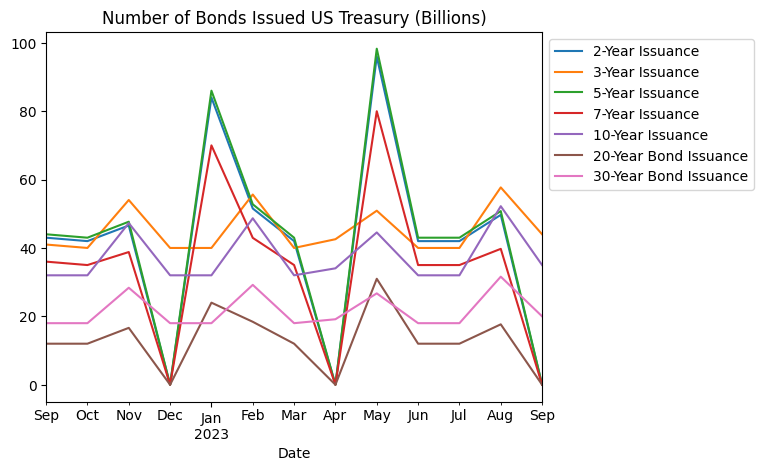

In [ ]:
p1 = bond_issuance_data.plot()
p1.set_title("Number of Bonds Issued US Treasury (Billions)",color='black')
p1.legend(bbox_to_anchor=(1.0, 1.0))
p1.plot()

The figure above illustrates the monthly issuance of bonds in billions over the past year from September 2022 to September 2023. Notably 2, 5 and 7 year bonds follow a cyclical issuance cycle, in January and May. This cyclical behavior accounts for the high variance observed in issuance volumes for these bonds in our dataset. Overall, 3 year bonds, 2 year bonds and finally 5 year bonds display the greatest issuance rates throughout the year. 3 year bonds are issued more consistently throughout the year while 2 & 5 year bonds follow a cyclical pattern. In contrast, longer term bonds of 20 and 30 years have the lowest issuance rates.

In [ ]:
bond_trade_data.describe()

,Coupon Securities Due =< 2Y Trade Volume,Coupon Securities Due > 2Y but =< 3Y Trade Volume,Coupon Securities Due > 3Y but =<5Y Trade Volume,Coupon Securities Due > 5Y but =< 7Y Trade Volume,Coupon Securities Due > 7Y but =< 10Y Trade Volume,Coupon Securities Due > 10Y Trade Volume,Coupon Securities Due > 10Y but =< 20Y Trade Volume,Coupon Securities Due > 20Y Trade Volume
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.0,13.000000,13.000000
mean,103.832251,68.619310,149.686909,46.946389,107.667681,0.0,17.075615,49.653230
std,12.786461,10.527503,26.587524,8.235132,16.589157,0.0,3.222238,9.445589
min,72.852381,51.133333,95.680952,29.114286,69.076190,0.0,11.478947,34.109524
25%,100.057895,62.761905,139.221053,43.309524,98.861905,0.0,15.561905,41.180952
50%,105.033333,66.634783,148.285000,46.573684,106.189474,0.0,17.657143,52.135000
75%,108.740909,71.920000,162.133333,54.304545,118.413636,0.0,18.600000,57.184211
max,127.495652,89.465000,202.291304,57.513043,129.660870,0.0,22.020000,62.086957


[]

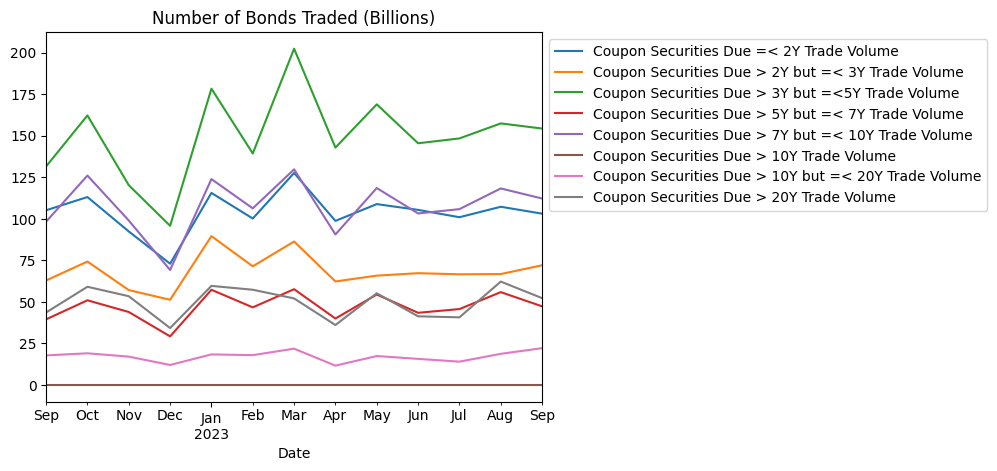

In [ ]:
p2 = bond_trade_data.plot()
p2.set_title("Number of Bonds Traded (Billions)",color='black')
p2.legend(bbox_to_anchor=(1.0, 1.0))
p2.plot()

The plot above illustrates that bonds with maturity due in greater than 3 years up to 5 are the most favored choice for trading in secondary markets. The second most traded category comprises bonds with maturities greater than 7 years and less than 10, closely followed by bonds due in less than 2 years. Notably, bonds which are not due for 10 years or more are not popular to trade. Finally, in the next figure, we observe the total volume of bonds in billions traded and issued over the past year.

[]

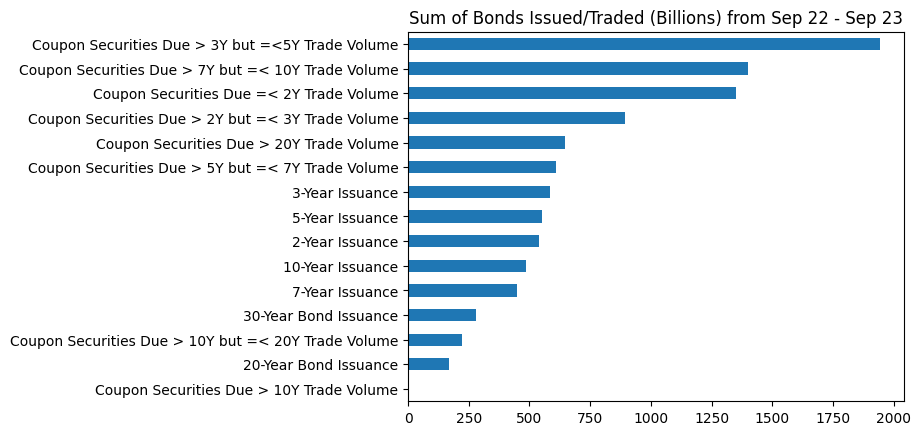

In [ ]:
sum = bond_data.sum().sort_values(ascending = True)
p2 = sum.plot(kind = 'barh')
p2.set_title("Sum of Bonds Issued/Traded (Billions) from Sep 22 - Sep 23",color='black')
p2.plot()

## Part 4 - Conclusion

Based on the exploratory analysis in this document, we can provide recommendations to our security lending team, taking into account the proposed contract length. For instance, if the proposed contract spans less than 2 years, then we would recommend using a bond with initial maturity of 5 years. This is because 5-year bonds have the second highest issuance rate and
are hence readily available and at the end of 2 years, the maturity of this bond will fall within the 3-5 year range, making it the most in demand in the secondary market. This can help mitigate some liquidity risk.

However, we would recommend that the financing team also remain vigilant about
monitoring the US Treasury offered interest rates, which may affect the bond’s value throughout the contract period. Since if interest rates were to decline during the contract's duration, the value of the bond would theoretically increase. This would introduce some collateral risk as the initial collateral provided would be worth less than the increased bond value. To alleviate some
of this risk, the team could consider reinvesting the collateral provided throughout the contract term, though this could pose risks of its own.

**References:**

*   “Treasury Yield 5 Years (^FVX) Historical Data - Yahoo Finance.” Finance.yahoo.com, finance.yahoo.com/quote/%5EFVX/history?p=%5EFVX.
* “CBOE Interest Rate 10 Year T No (^TNX) Historical Data - Yahoo Finance.” Finance.yahoo.com, finance.yahoo.com/quote/%5ETNX/history?p=%5ETNX.
*   “Treasury Yield 30 Years (^TYX) Historical Data - Yahoo Finance.” Finance.yahoo.com, finance.yahoo.com/quote/%5ETYX/history?p=%5ETYX.
*   Trading economics. “United States Fed Funds Rate.” Tradingeconomics.com, 2023, tradingeconomics.com/united-states/interest-rate.
* “US Fixed Income Securities Statistics.” SIFMA, 5 Oct. 2023, www.sifma.org/resources/research/us-fixed-income-securities-statistics/.